In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
wine_data = pd.read_csv(r'https://raw.githubusercontent.com/data-max-hq/workshop-epoka/main/data/winequality-red.csv')
wine_data.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,5
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,5
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>],
       [<AxesSubplot:title={'center':'citric acid'}>, <AxesSubplot:>]],
      dtype=object)

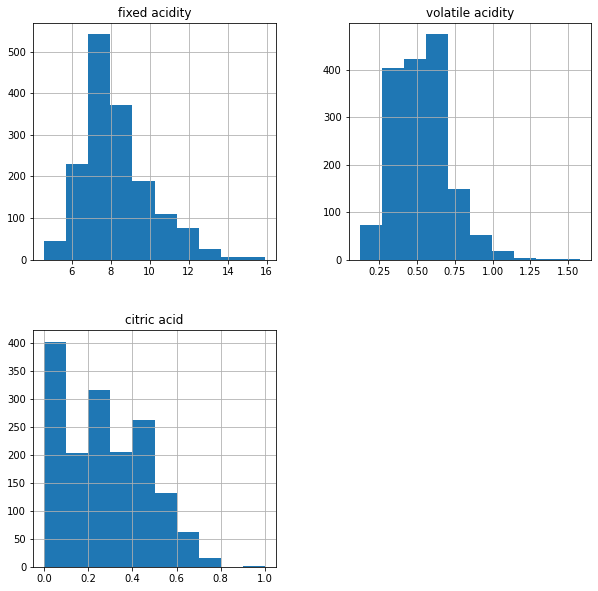

In [4]:
wine_data.hist(column=['fixed acidity','volatile acidity','citric acid'],figsize=[10,10])

<AxesSubplot:>

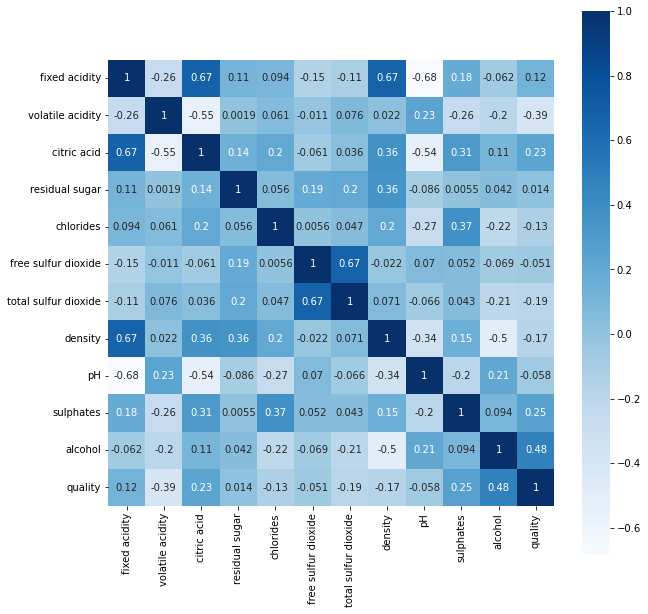

In [5]:
correlation = wine_data.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

<AxesSubplot:xlabel='quality', ylabel='count'>

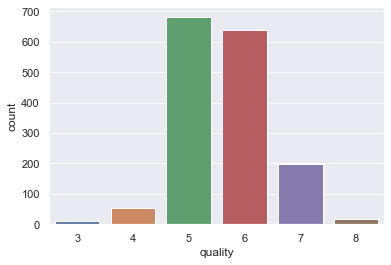

In [6]:
sns.set_theme(style="darkgrid")
sns.countplot(data=wine_data, x='quality')

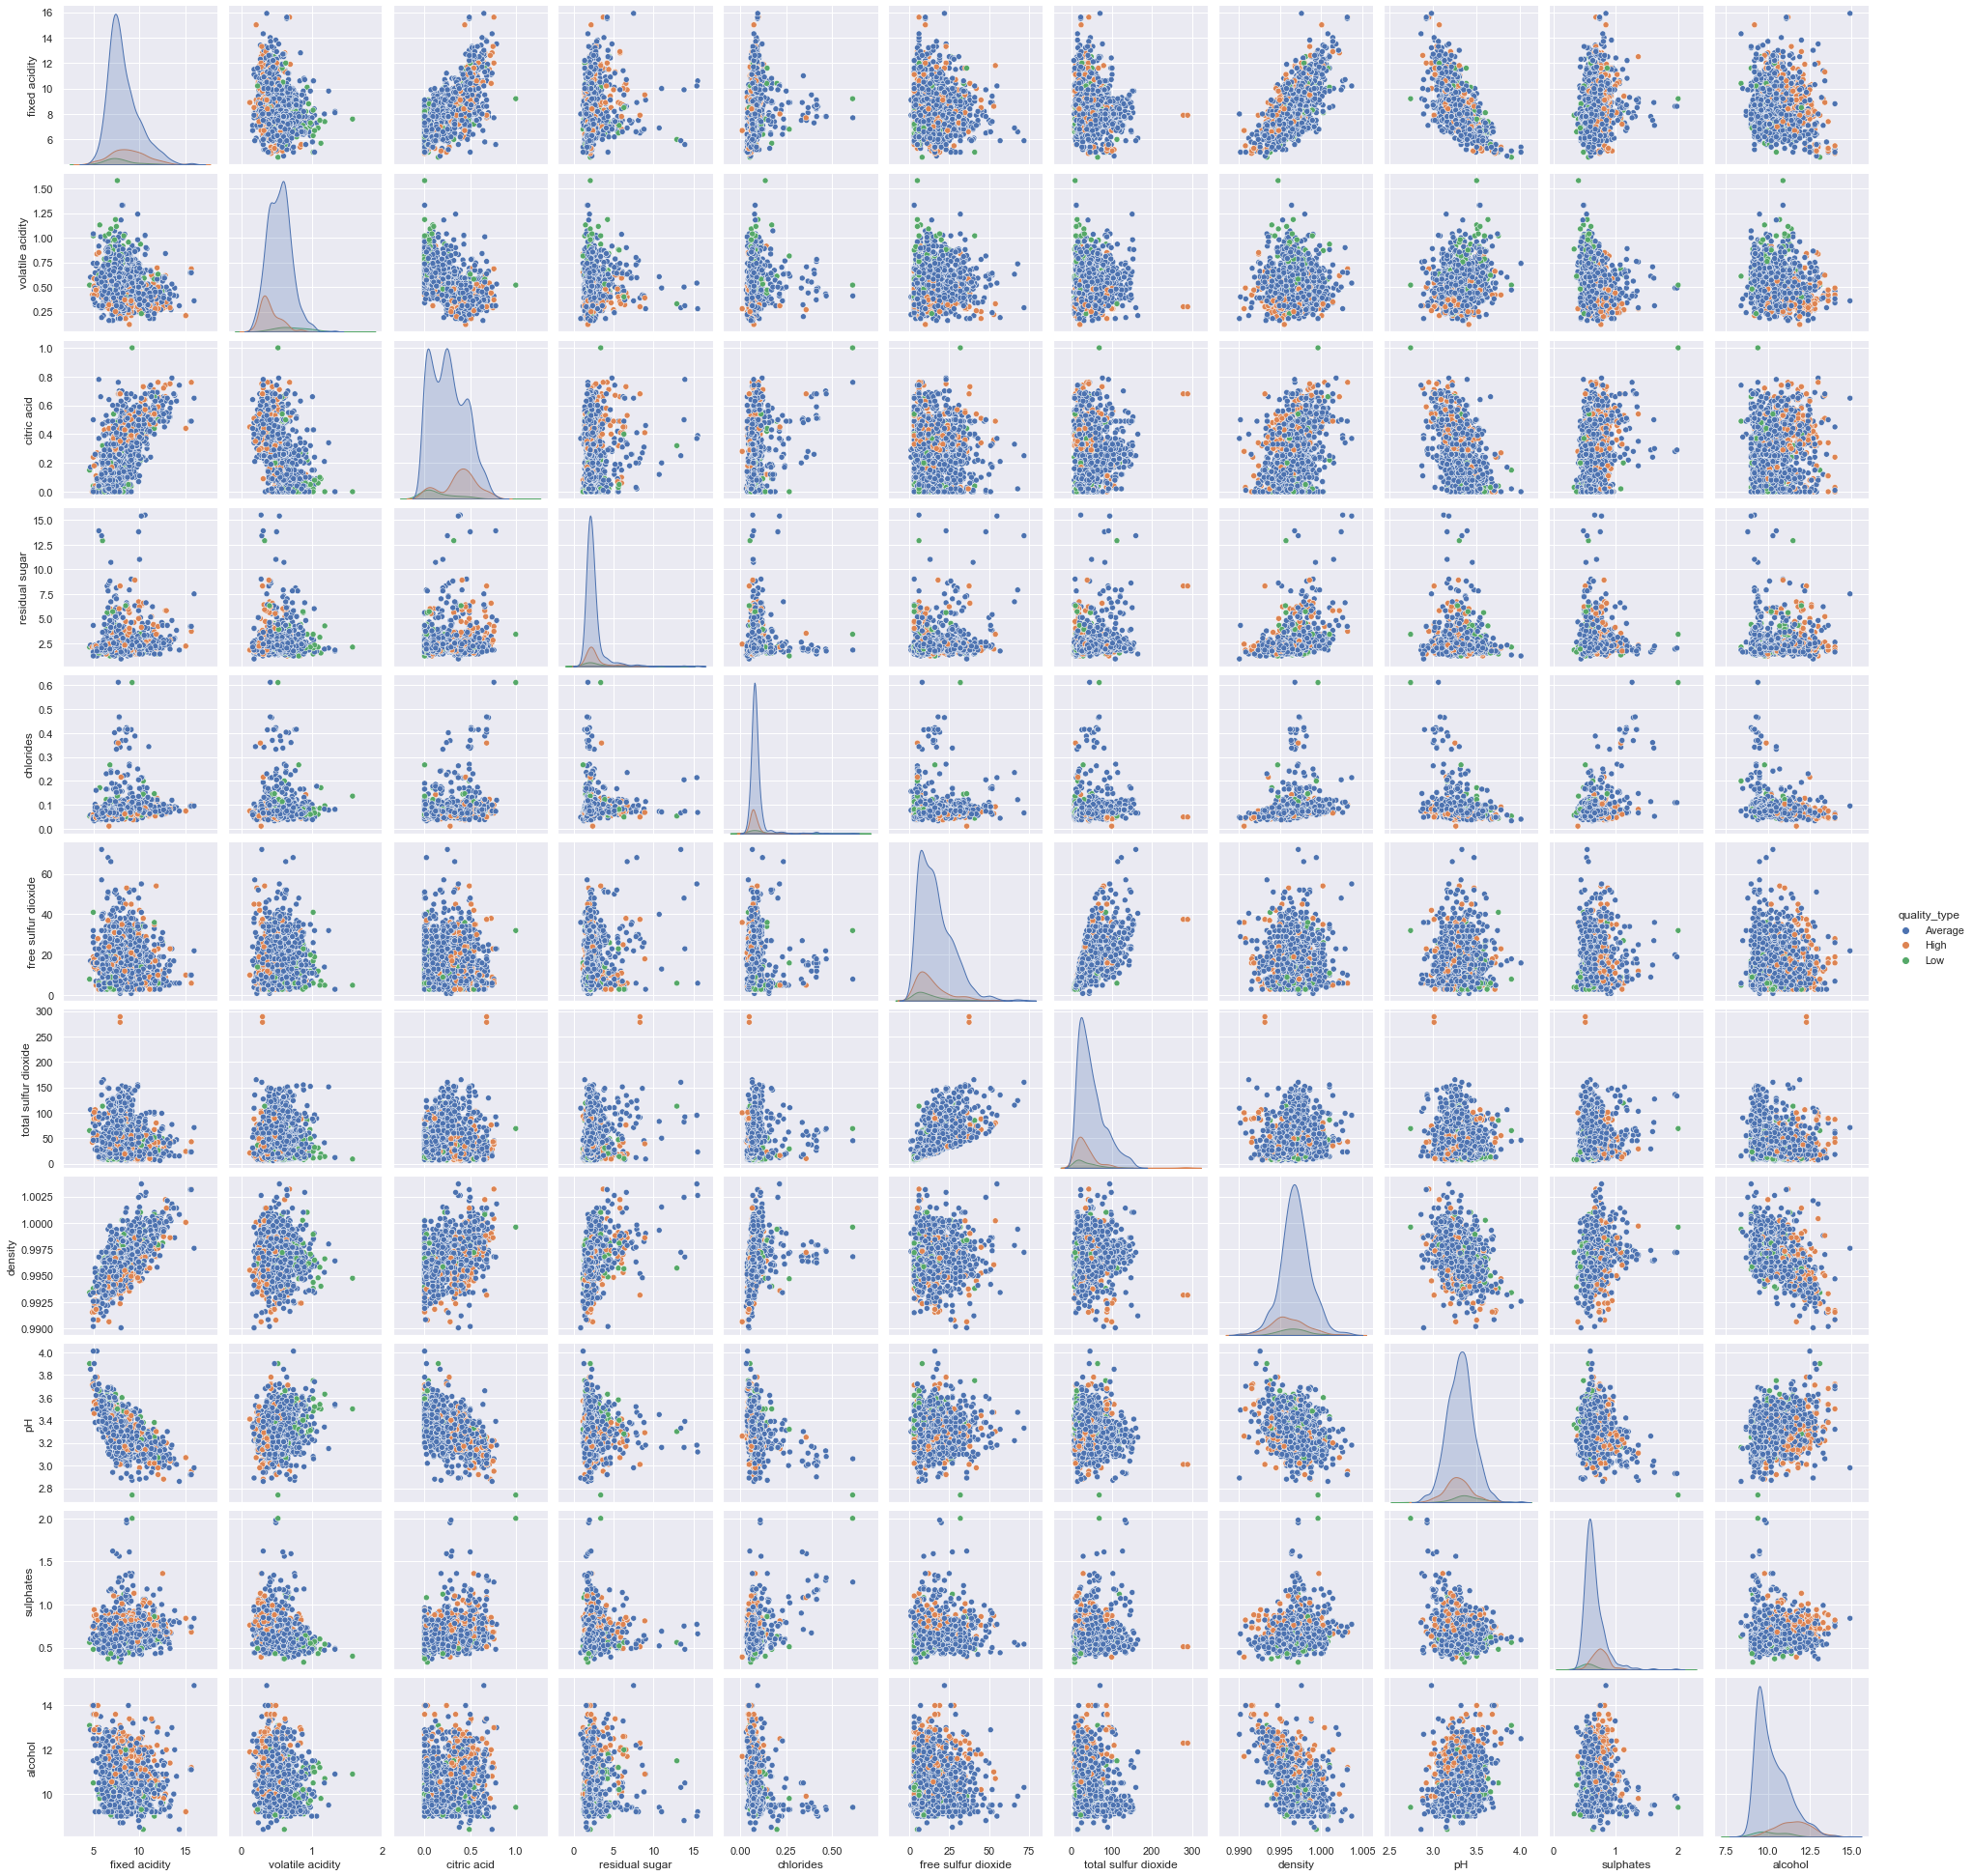

In [14]:
def check_quality(quality):
    if quality <= 4:
        return "Low"
    elif quality <= 6:
        return "Average"
    else:
        return "High"

wine_data['quality_type'] = wine_data['quality'].apply(check_quality)
sns.pairplot(data=wine_data.drop(columns='quality'),hue='quality_type' )

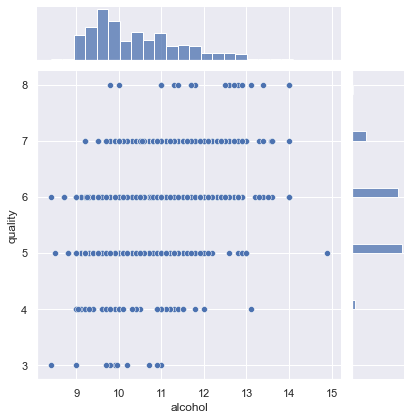

In [15]:
sns.jointplot(data=wine_data, x='alcohol', y='quality', kind='scatter')

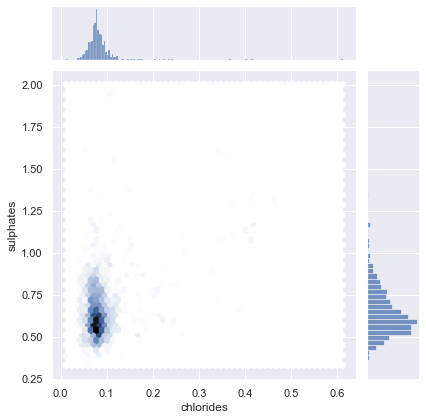

In [17]:
sns.jointplot(data=wine_data, x='chlorides', y='sulphates', kind='hex')

<AxesSubplot:xlabel='residual sugar', ylabel='free sulfur dioxide'>

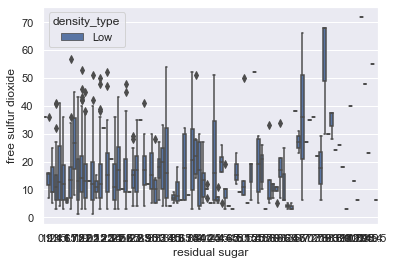

In [34]:
def check_density(density):
    if density > wine_data.density.mean():
        return "High"
    else:
        return "Low"

wine_data['density_type'] = wine_data['density'].apply(check_quality)

sns.boxplot(x='residual sugar', y='free sulfur dioxide', data=wine_data, hue = 'density_type')

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>

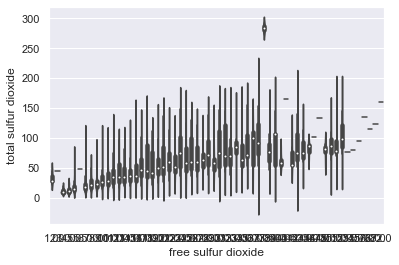

In [35]:
sns.violinplot(x='free sulfur dioxide', y='total sulfur dioxide',data=wine_data)